In [41]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




## Dataframe Importieren


In [42]:

holidays_events = pd.read_csv("./database/holidays_events.csv")
train = pd.read_csv('./database/train.csv')
test = pd.read_csv('./database/test.csv')
transactions = pd.read_csv('./database/transactions.csv')
stores = pd.read_csv('./database/stores.csv')
oil = pd.read_csv('./database/oil.csv')
sample_submission = pd.read_csv('./database/sample_submission.csv')

## Dataframe Kombinieren
le dataframe actuel contient seulement les ventes actuelles. mais n'a pas les informations sur les stores , oil , holiday ,transactions. 




In [43]:
train_dataset = train.merge(oil, on = 'date', how= 'left')
train_dataset = train_dataset.merge(holidays_events, on = 'date', how = 'left')
train_dataset = train_dataset.merge(stores, on = 'store_nbr', how = 'left')
train_dataset = train_dataset.merge(transactions, on = ['date','store_nbr'], how= 'left')
train_dataset.head()


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN


In [44]:
train_dataset = train_dataset.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
train_dataset.head()


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN


In [45]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
id              int64
date            object
store_nbr       int64
family          object
sales           float64
onpromotion     int64
dcoilwtico      float64
holiday_type    object
locale          object
locale_name     object
description     object
transferred     object
city            object
state           object
store_type      object
cluster         int64
transactions    float64
dtypes: float64(3), int64(4), object(10)
memory usage: 419.5+ MB


In [46]:
test_dataframe = test.merge(oil, on = 'date', how='left')
test_dataframe = test_dataframe.merge(holidays_events, on = 'date', how='left')
test_dataframe = test_dataframe.merge(stores, on = 'store_nbr', how='left')
test_dataframe = test_dataframe.merge(transactions, on = ['date', 'store_nbr'], how='left')
test_dataframe = test_dataframe.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
test_dataframe.head()
test_dataframe.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 16 columns):
id              28512 non-null int64
date            28512 non-null object
store_nbr       28512 non-null int64
family          28512 non-null object
onpromotion     28512 non-null int64
dcoilwtico      21384 non-null float64
holiday_type    1782 non-null object
locale          1782 non-null object
locale_name     1782 non-null object
description     1782 non-null object
transferred     1782 non-null object
city            28512 non-null object
state           28512 non-null object
store_type      28512 non-null object
cluster         28512 non-null int64
transactions    0 non-null float64
dtypes: float64(2), int64(4), object(10)
memory usage: 3.7+ MB


## Spalte 'Date' in Datetime convertieren 
## Verschiedene Datum anhand Features hinzufügen 

In [47]:
def add_date_features(df):
    
    df['date'] = pd.to_datetime(df['date'])
    
    df['dayofweek'] = df['date'].dt.dayofweek  # Day of the week (Monday is 0 and Sunday is 6)
    df['quarter'] = df['date'].dt.quarter      # Quarter of the year
    df['month'] = df['date'].dt.month          # Month (1 to 12)
    df['year'] = df['date'].dt.year            # Year
    df['dayofyear'] = df['date'].dt.dayofyear  # Day of the year
    df['dayofmonth'] = df['date'].dt.day       # Day of the month

    return df

In [49]:
train_dataset= add_date_features(train_dataset)
test_dataframe= add_date_features(test_dataframe)
train_dataset.tail(5)

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,...,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,...,Pichincha,B,6,2155.0,1,3,8,2017,227,15
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,...,Pichincha,B,6,2155.0,1,3,8,2017,227,15
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,...,Pichincha,B,6,2155.0,1,3,8,2017,227,15
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,...,Pichincha,B,6,2155.0,1,3,8,2017,227,15
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,47.57,Holiday,Local,Riobamba,...,Pichincha,B,6,2155.0,1,3,8,2017,227,15


In [50]:
test_dataframe.tail(5)

,id,date,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,...,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
28507,3029395,2017-08-31,9,POULTRY,1,47.26,NaN,NaN,NaN,NaN,...,Pichincha,B,6,NaN,3,3,8,2017,243,31
28508,3029396,2017-08-31,9,PREPARED FOODS,0,47.26,NaN,NaN,NaN,NaN,...,Pichincha,B,6,NaN,3,3,8,2017,243,31
28509,3029397,2017-08-31,9,PRODUCE,1,47.26,NaN,NaN,NaN,NaN,...,Pichincha,B,6,NaN,3,3,8,2017,243,31
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26,NaN,NaN,NaN,NaN,...,Pichincha,B,6,NaN,3,3,8,2017,243,31
28511,3029399,2017-08-31,9,SEAFOOD,0,47.26,NaN,NaN,NaN,NaN,...,Pichincha,B,6,NaN,3,3,8,2017,243,31


In [51]:
train_dataset.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       955152
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
dayofweek             0
quarter               0
month                 0
year                  0
dayofyear             0
dayofmonth            0
dtype: int64

## transfered Tag finden 

In [52]:
tranfered_days = {date: item for date, item in zip(holidays_events['date'], holidays_events['transferred']) if item}
tranfered_days


{'2012-10-09': True,
 '2013-10-09': True,
 '2014-10-09': True,
 '2016-05-24': True,
 '2016-07-25': True,
 '2016-08-10': True,
 '2017-01-01': True,
 '2017-04-12': True,
 '2017-05-24': True,
 '2017-08-10': True,
 '2017-09-28': True,
 '2017-12-06': True}

In [53]:
train_dataset.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,...,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1


## prüfen, ob es ein Tranferred Datum im Train_dataset gibt

In [54]:

train_dataset['transferred'] = train_dataset['date'].map(tranfered_days)
train_dataset['transferred'] = train_dataset['transferred'].fillna(value=False)
test_dataframe['transferred'] = test_dataframe['date'].map(tranfered_days)
test_dataframe['transferred'] = test_dataframe['transferred'].fillna(value=False)

In [55]:
train_dataset.head()
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 23 columns):
id              int64
date            datetime64[ns]
store_nbr       int64
family          object
sales           float64
onpromotion     int64
dcoilwtico      float64
holiday_type    object
locale          object
locale_name     object
description     object
transferred     bool
city            object
state           object
store_type      object
cluster         int64
transactions    float64
dayofweek       int64
quarter         int64
month           int64
year            int64
dayofyear       int64
dayofmonth      int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(10), object(8)
memory usage: 538.9+ MB


## null Werte prüfen 

In [56]:
print(train_dataset.isnull().sum())

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       955152
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred           0
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
dayofweek             0
quarter               0
month                 0
year                  0
dayofyear             0
dayofmonth            0
dtype: int64


In [57]:
print(test_dataframe.isnull().sum())

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
dcoilwtico       7128
holiday_type    26730
locale          26730
locale_name     26730
description     26730
transferred         0
city                0
state               0
store_type          0
cluster             0
transactions    28512
dayofweek           0
quarter             0
month               0
year                0
dayofyear           0
dayofmonth          0
dtype: int64


In [20]:
pip install scikit-learn

## Daten Encoding 

 

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
train_dataset.info()
train_dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 23 columns):
id              int64
date            datetime64[ns]
store_nbr       int64
family          object
sales           float64
onpromotion     int64
dcoilwtico      float64
holiday_type    object
locale          object
locale_name     object
description     object
transferred     bool
city            object
state           object
store_type      object
cluster         int64
transactions    float64
dayofweek       int64
quarter         int64
month           int64
year            int64
dayofyear       int64
dayofmonth      int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(10), object(8)
memory usage: 538.9+ MB


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,...,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1


In [60]:
target_name = ['family','city','state',
               'store_type','transferred','year',
               'holiday_type', 'locale','locale_name',
               'description'
               ]


train_dataset[target_name] = train_dataset[target_name].apply(LabelEncoder().fit_transform)
test_dataframe[target_name] = test_dataframe[target_name].apply(LabelEncoder().fit_transform)


In [61]:
train_dataset.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,...,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,0,2013-01-01,1,0,0.0,0,NaN,3,1,4,...,12,3,13,NaN,1,1,1,0,1,1
1,1,2013-01-01,1,1,0.0,0,NaN,3,1,4,...,12,3,13,NaN,1,1,1,0,1,1
2,2,2013-01-01,1,2,0.0,0,NaN,3,1,4,...,12,3,13,NaN,1,1,1,0,1,1
3,3,2013-01-01,1,3,0.0,0,NaN,3,1,4,...,12,3,13,NaN,1,1,1,0,1,1
4,4,2013-01-01,1,4,0.0,0,NaN,3,1,4,...,12,3,13,NaN,1,1,1,0,1,1


In [62]:
#check for nan
print(train_dataset.isnull().sum())
print(test_dataframe.isnull().sum())

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico      955152
holiday_type         0
locale               0
locale_name          0
description          0
transferred          0
city                 0
state                0
store_type           0
cluster              0
transactions    249117
dayofweek            0
quarter              0
month                0
year                 0
dayofyear            0
dayofmonth           0
dtype: int64
id                  0
date                0
store_nbr           0
family              0
onpromotion         0
dcoilwtico       7128
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
city                0
state               0
store_type          0
cluster             0
transactions    28512
dayofweek           0
quarter             0
month               0
year                0
dayofyear         

## None Werte Entfernen

In [63]:
# Schleife über die Spalten von df_train1:
for i in train_dataset.iloc[0:0]:
    # Überprüfen, ob die Spalte zu target_main gehört:
    if i in target_name:
        # Wenn ja, fehlende Werte mit dem Modus der Spalte auffüllen:
        train_dataset[i] = train_dataset[i].fillna(train_dataset[i].mode()[0])
    else:
        # Andernfalls fehlende Werte mit der Rückwärts-Auffüllungsmethode (bfill) auffüllen:
        train_dataset[i] = train_dataset[i].fillna(method='bfill')

# Schleife über die Spalten von df_test1:
for i in test_dataframe.iloc[0:0]:
    # Überprüfen, ob die Spalte zu target_main gehört:
    if i in target_name:
        # Wenn ja, fehlende Werte mit dem Modus der Spalte auffüllen:
        test_dataframe[i] = test_dataframe[i].fillna(test_dataframe[i].mode()[0])
    else:
        # Andernfalls fehlende Werte mit der Rückwärts-Auffüllungsmethode (bfill) auffüllen:
        test_dataframe[i] = test_dataframe[i].fillna(method='bfill')


In [64]:
#check for nan
print(train_dataset.isnull().sum())
#print(test_dataframe.isnull().sum())


id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
dcoilwtico      0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
city            0
state           0
store_type      0
cluster         0
transactions    0
dayofweek       0
quarter         0
month           0
year            0
dayofyear       0
dayofmonth      0
dtype: int64


In [65]:
#check for nan
print(test_dataframe.isnull().sum())

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
dcoilwtico          0
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
city                0
state               0
store_type          0
cluster             0
transactions    28512
dayofweek           0
quarter             0
month               0
year                0
dayofyear           0
dayofmonth          0
dtype: int64


In [66]:
test_dataframe['transactions'] = test_dataframe['transactions'].fillna(0)
print(test_dataframe.isnull().sum())


id              0
date            0
store_nbr       0
family          0
onpromotion     0
dcoilwtico      0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
city            0
state           0
store_type      0
cluster         0
transactions    0
dayofweek       0
quarter         0
month           0
year            0
dayofyear       0
dayofmonth      0
dtype: int64


In [67]:
#delete sales, id, date, transactions, from train
y = train_dataset['sales']
X = train_dataset.drop(['sales','date','id'], axis=1)
#take test from data
X_real_test = (test_dataframe.drop(['date','id'], axis=1))

print(X.info())
print(X_real_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 20 columns):
store_nbr       int64
family          int64
onpromotion     int64
dcoilwtico      float64
holiday_type    int64
locale          int64
locale_name     int64
description     int64
transferred     int64
city            int64
state           int64
store_type      int64
cluster         int64
transactions    float64
dayofweek       int64
quarter         int64
month           int64
year            int64
dayofyear       int64
dayofmonth      int64
dtypes: float64(2), int64(18)
memory usage: 489.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 20 columns):
store_nbr       28512 non-null int64
family          28512 non-null int64
onpromotion     28512 non-null int64
dcoilwtico      28512 non-null float64
holiday_type    28512 non-null int64
locale          28512 non-null int64
locale_name     28512 non-null int64
description    

## Tensorflow Neural Network

In [68]:
import tensorflow as tf

print("Version de TensorFlow :", tf.__version__)


Version de TensorFlow : 2.6.2


In [69]:
#import keras
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

## Die Funktion train_test_split aus dem Modul sklearn.model_selection wird verwendet,um die Daten in Trainings- (X_train, y_train) und Testsets (X_test, y_test) zu teilen.

In [70]:
# lets separate data for X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1, test_size=0.1)

X.head()

,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,1,0,0,93.14,3,1,4,50,0,18,12,3,13,770.0,1,1,1,0,1,1
1,1,1,0,93.14,3,1,4,50,0,18,12,3,13,770.0,1,1,1,0,1,1
2,1,2,0,93.14,3,1,4,50,0,18,12,3,13,770.0,1,1,1,0,1,1
3,1,3,0,93.14,3,1,4,50,0,18,12,3,13,770.0,1,1,1,0,1,1
4,1,4,0,93.14,3,1,4,50,0,18,12,3,13,770.0,1,1,1,0,1,1


# Model Erstellung

Epoch 1/20
2983/2983 [==============================] - 17s 5ms/step - loss: 829215.9375 - mae: 380.4215
Epoch 2/20
2983/2983 [==============================] - 16s 5ms/step - loss: 756590.3125 - mae: 354.0618
Epoch 3/20
2983/2983 [==============================] - 19s 6ms/step - loss: 717280.8750 - mae: 335.3054
Epoch 4/20
2983/2983 [==============================] - 20s 7ms/step - loss: 688035.0625 - mae: 324.5440
Epoch 5/20
2983/2983 [==============================] - 15s 5ms/step - loss: 670441.8750 - mae: 319.5345
Epoch 6/20
2983/2983 [==============================] - 15s 5ms/step - loss: 630064.0625 - mae: 309.8902
Epoch 7/20
2983/2983 [==============================] - 15s 5ms/step - loss: 547344.8750 - mae: 286.6981
Epoch 8/20
2983/2983 [==============================] - 16s 5ms/step - loss: 497914.1562 - mae: 269.3250
Epoch 9/20
2983/2983 [==============================] - 15s 5ms/step - loss: 470369.3750 - mae: 259.2074
Epoch 10/20
2983/2983 [==============================] 

<Figure size 432x288 with 0 Axes>

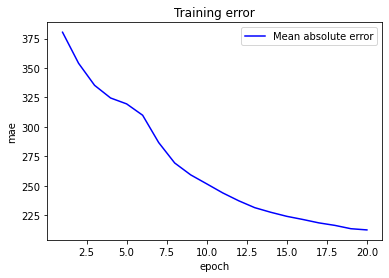

<Figure size 432x288 with 0 Axes>

In [71]:
#build the model
#with weight regulatization L1 and L2


L1 = 0.001
L2 = 0.1

model = tf.keras.models.Sequential()
model.add(layers.Dense(64,
                       activation='selu',
                       input_shape=(20, )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,
                       activation='selu'
                      ))
#output layer as regression 
model.add(layers.Dense(1,
                       activation='selu',))

#backprop settings
RMS = optimizers.RMSprop(
    learning_rate=0.01,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    #weight_decay=None,
    #clipnorm=None,
    #clipvalue=None,
    #global_clipnorm=None,
    #use_ema=False,
    #ema_momentum=0.99,
    #ema_overwrite_frequency=10,
    #jit_compile=True,
    name="RMSprop"
)


model.compile(optimizer=RMS, loss='mse', metrics=['mae'])
history = model.fit(X, y, batch_size=1024, epochs=20, verbose=1) 

#graph
loss = history.history['mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Mean absolute error')
plt.title('Training error')
plt.xlabel("epoch")
plt.ylabel("mae")
plt.legend()
plt.figure()

In [72]:
#summary error on test data
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE:', mse)
print('MAE:', mae)

MSE: 325447.25
MAE: 207.61004638671875


In [81]:
y_real_test = model.predict(X_real_test)
#change data in sample_submission.csv 
sample_submission["sales"] = y_real_test
sample_submission.to_csv('answer.csv', index=False)
#head new data of passengers
sample_submission.head(20)

,id,sales
0,3000888,-1.758099
1,3000889,-1.758099
2,3000890,-1.758099
3,3000891,-1.758099
4,3000892,-1.758099
5,3000893,-1.758099
6,3000894,-1.758099
7,3000895,-1.758099
8,3000896,-1.758099
9,3000897,-1.758099


In [82]:
#combine results
df_test_final = test_dataframe.merge(sample_submission, on = 'id', how='left')
df_test_final.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,...,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth,sales
0,3000888,2017-08-16,1,0,0,46.8,1,1,1,1,...,3,13,0.0,2,3,8,0,228,16,-1.758099
1,3000889,2017-08-16,1,1,0,46.8,1,1,1,1,...,3,13,0.0,2,3,8,0,228,16,-1.758099
2,3000890,2017-08-16,1,2,2,46.8,1,1,1,1,...,3,13,0.0,2,3,8,0,228,16,-1.758099
3,3000891,2017-08-16,1,3,20,46.8,1,1,1,1,...,3,13,0.0,2,3,8,0,228,16,-1.758099
4,3000892,2017-08-16,1,4,0,46.8,1,1,1,1,...,3,13,0.0,2,3,8,0,228,16,-1.758099


In [ ]:
!pip install --upgrade nbformat


  Using cached nbformat-5.9.2-py3-none-any.whl.metadata (3.4 kB)
Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0


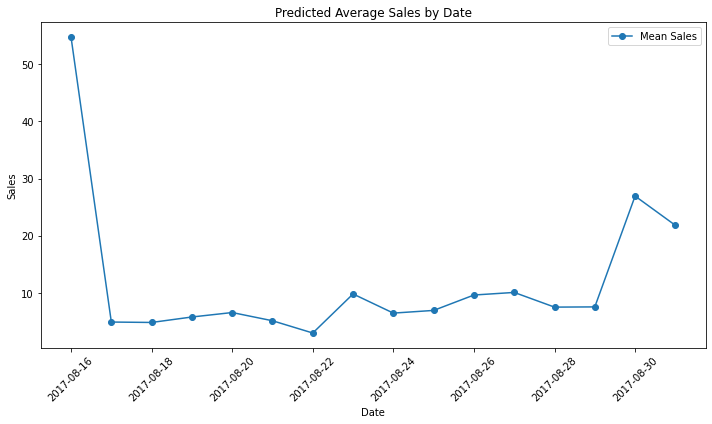

In [86]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
import pandas as pd

# Grouper et agréger les données
agg = df_test_final.groupby('date')['sales'].mean().reset_index()

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(agg['date'], agg['sales'], label='Mean Sales', marker='o')

# Ajouter des titres et libellés
plt.title('Predicted Average Sales by Date')
plt.xlabel('Date')
plt.ylabel('Sales')

# Décaler les jours sur l'axe des abscisses avec un décalage de 2 jours
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(DayLocator(interval=2))

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la disposition pour éviter que les étiquettes ne se chevauchent
plt.show()

